In [1]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as patches
from highlight_text import fig_text

In [2]:
df = pd.read_excel("African_inflation.xlsx")

In [3]:
world = gpd.read_file("ne_110m_admin_0_countries.shp")

In [4]:
Countries = world[(world["CONTINENT"] == "Africa")]

In [5]:
inflation_per_country = df.pivot_table(
    values="Last",
    index = "Country",
    aggfunc={"Last":"sum"}
).reset_index()

In [6]:
data = Countries.merge(inflation_per_country, how="left", left_on="SOVEREIGNT", right_on="Country")
data.dropna(subset=["Country"], inplace=True)

In [7]:
countries_to_annotate  = list(data["Country"])

In [8]:
projections = data.to_crs(epsg=3035)
projections["centroid"] = projections.geometry.centroid
data["centroid"] = projections["centroid"].to_crs(data.crs)

In [37]:
adjustments = {
    'Cameroon':(-2, 0),
    'Ghana':(-1.25, -1),
    'Togo':(-0.6, -0.5),
    'Namibia': (-1, 0),
    'Gabon': (-1, 0),
    'Zambia':(0, -1),
    'Zimbabwe':(-1.5, 0),
    'Benin' : (-0.75, 0),
    'Uganda':(-1, 0),
    'Malawi':(-1.5, 0),
    'Egypt':(-1, 0),
    'Mauritius':(-1.5, 0),
    'Kenya':(-1, 0),
    'Madagascar':(-1.5, 0)
    
}

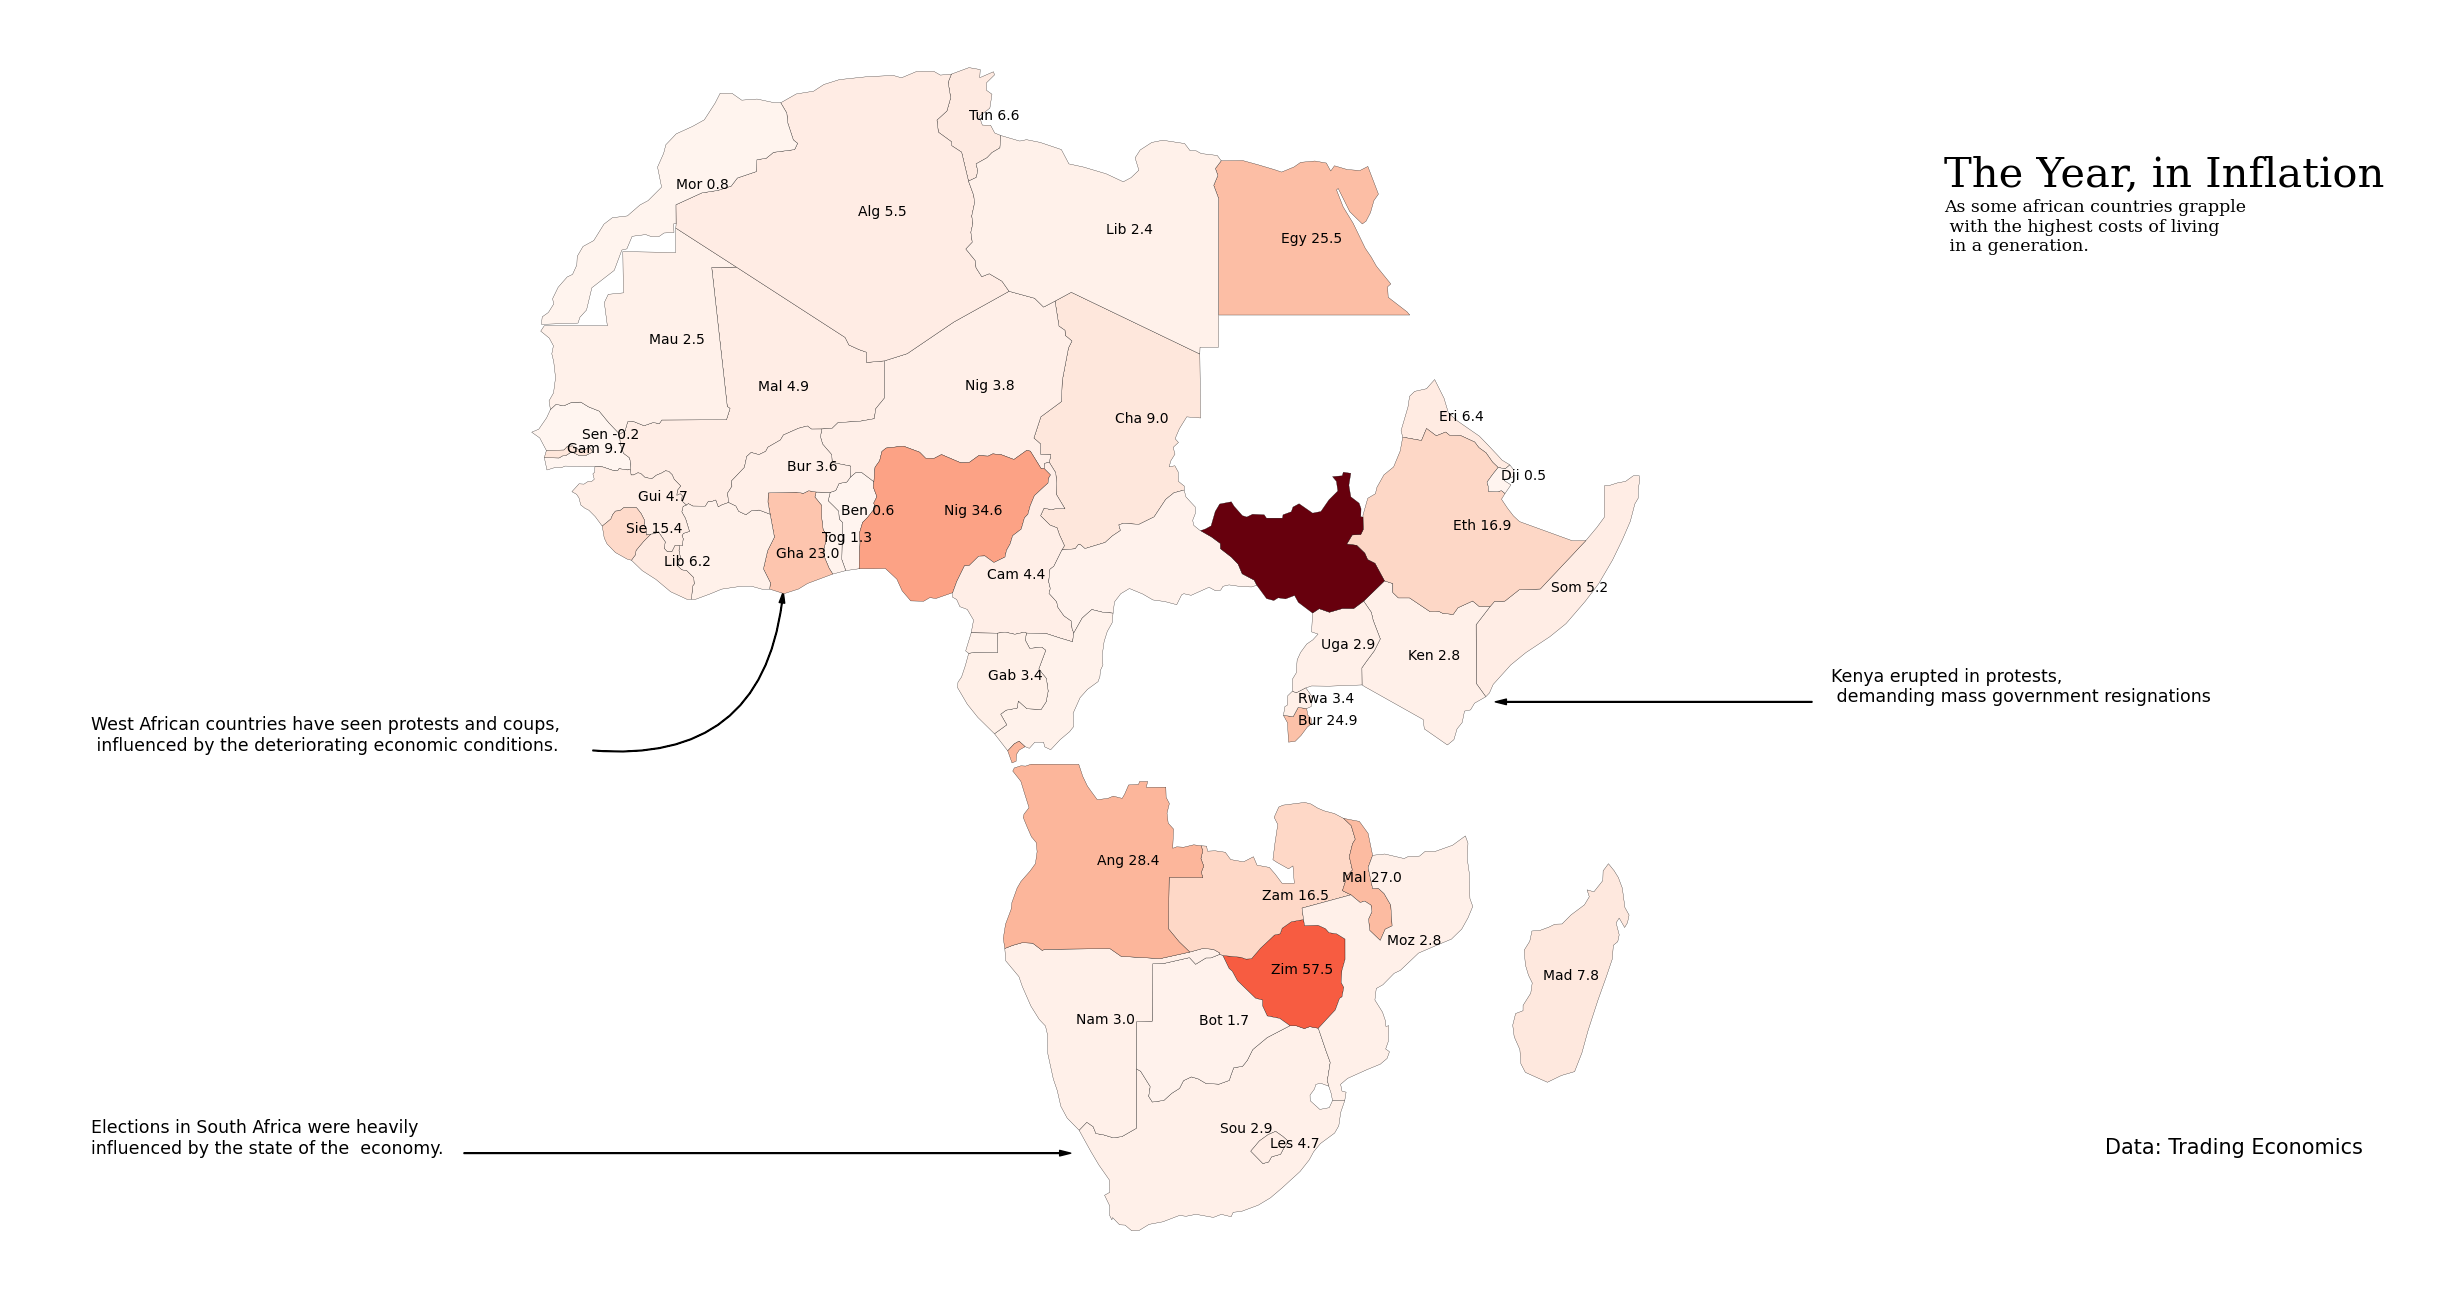

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
ax.text(70, 30, 'The Year, in Inflation', fontsize=30, fontfamily='serif')
ax.text(70, 26, 'As some african countries grapple \n with the highest costs of living \n in a generation.', fontsize=12.5, fontfamily='serif')
ax.text(-45, -5, 'West African countries have seen protests and coups, \n influenced by the deteriorating economic conditions.',fontsize = 12.5,
       fontfamily = 'DejaVu Sans',)
ax.text(-45, -30, 'Elections in South Africa were heavily \ninfluenced by the state of the  economy.',fontsize = 12.5,
       fontfamily = 'DejaVu Sans',)
text = "Data: Trading Economics"
ax.text(80, -30, s=text, color='black', fontsize=15)
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
tail_position = (-2, 5)
head_position = (-14, -5)
kw = dict(arrowstyle=style, color="k")
a = patches.FancyArrowPatch(head_position, tail_position, connectionstyle = 'arc3, rad=.5',**kw)
head_position = (-22, -30)
tail_position = (16,-30)
kw = dict(arrowstyle=style, color="k")
c = patches.FancyArrowPatch(head_position, tail_position,**kw)
ax.text(63, -2, 'Kenya erupted in protests,\n demanding mass government resignations',fontsize = 12.5,
       fontfamily = 'DejaVu Sans',)
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
tail_position = (42, -2)
head_position = (62, -2)
kw = dict(arrowstyle=style, color="k")
b = patches.FancyArrowPatch(head_position, tail_position,**kw)
plt.gca().add_patch(a)
plt.gca().add_patch(b)
plt.gca().add_patch(c)

cmap = cm.Reds
ax.set_xlim(-50, 100)
min_rate, max_rate = data["Last"].min(), data["Last"].max()
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)
data.plot(ax=ax, column="Last", cmap=cmap, norm=norm, edgecolor="black", linewidth=0.2)
ax.axis("off")
for country in countries_to_annotate:
    try:
        centroid = data.loc[data["NAME"] == country,'centroid'].values[0]
        #print(f"{country}:",centroid)
    except IndexError:
        pass
        continue
    x, y = centroid.coords[0]
    if country in list(adjustments.keys()):
        x+= adjustments[country][0]
        y+= adjustments[country][1]
    inflation = data.loc[data["NAME"] == country, 'Last'].values[0]
    ax.annotate(f"{country[:3]} {inflation.round(1)}", (x, y), color='black')
    #print(x, y)
plt.tight_layout()
plt.savefig("2024_in_inflation.jpg")